# Library and System Setup

In [ ]:
!pip install phate

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phate

In [ ]:
class k_means:
    def __init__(self,data,k=3,colmap = None ,iter=100):
        self.data=data
        self.data.loc[:,'sum_score']=pd.DataFrame.multiply(self.data.iloc[:,:7],[5,3,6,3,2,5,6],axis=1).sum(axis=1)
        self.k=k
        self.shape=data.shape
        self.colmap=colmap
        self.iter=100
    def initialize(self):
        np.random.seed(1200)
        self.centroids=pd.DataFrame({i+1:np.random.rand(self.shape[1]) for i in range(self.k)}).T
    def assignment(self):
        centroid_distance_cols = ['distance_from_{}'.format(i) for i in self.centroids.index]
        for i in self.centroids.index:
            self.data.loc[:,'distance_from_{}'.format(i)]=np.sum((self.data.iloc[:,0:self.shape[1]]-self.centroids.loc[i,:])**2, axis=1)
        self.data.loc[:,'cluster']=self.data.loc[:, centroid_distance_cols].idxmin(axis=1)
        self.data.loc[:,'cluster'] = self.data.loc[:,'cluster'].map(lambda x: int(x.lstrip('distance_from_')))
        if self.colmap!=None:
            self.data.loc[:,'color'] = self.data.loc[:,'cluster'].map(lambda x: self.colmap[x])
    def update(self):
        for i in self.centroids.index:
            self.centroids.loc[i,:]=np.mean(self.data[self.data['cluster']==i],axis=0)
        self.assignment()
    def n_iter(self,n):
        for i in range(n):
            self.update()
    def cluster(self):
        self.initialize()
        self.assignment()
        for i in range(self.iter):
            self.update()
    def get_cluster(self):  
            return self.data['cluster']
    def cluster_return(self):
            self.cluster()
            return self.get_cluster()

# Import and Clean and Prepare Data

In [ ]:
raw_data=pd.read_csv('/content/MoCA7domains.csv', header=None)

In [ ]:
raw_data.head()

,0,1,2,3,4,5,6
0,0.8,1.00000,1.00000,0.00000,1.0,0.0,0.50000
1,0.2,1.00000,0.66667,0.66667,0.5,0.0,0.33333
2,1.0,0.66667,1.00000,0.66667,0.0,0.4,1.00000
3,0.2,1.00000,0.33333,0.66667,0.5,0.8,0.50000
4,0.8,1.00000,1.00000,1.00000,1.0,0.2,1.00000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6303 non-null   float64
 1   1       6303 non-null   float64
 2   2       6303 non-null   float64
 3   3       6303 non-null   float64
 4   4       6303 non-null   float64
 5   5       6303 non-null   float64
 6   6       6303 non-null   float64
dtypes: float64(7)
memory usage: 344.8 KB


In [ ]:
raw_data.describe()

,0,1,2,3,4,5,6
count,6303.000000,6303.000000,6303.000000,6303.000000,6303.000000,6303.000000,6303.000000
mean,0.806854,0.933683,0.895446,0.774870,0.847771,0.253594,0.903115
std,0.228869,0.159477,0.176824,0.284843,0.295606,0.243486,0.202445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,1.000000,0.833330,0.666670,1.000000,0.000000,0.833330
50%,0.800000,1.000000,1.000000,1.000000,1.000000,0.200000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.400000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
raw_data_unique=raw_data.drop_duplicates(ignore_index=True)

In [ ]:
raw_data_unique

,0,1,2,3,4,5,6
0,0.8,1.00000,1.00000,0.00000,1.0,0.0,0.50000
1,0.2,1.00000,0.66667,0.66667,0.5,0.0,0.33333
2,1.0,0.66667,1.00000,0.66667,0.0,0.4,1.00000
3,0.2,1.00000,0.33333,0.66667,0.5,0.8,0.50000
4,0.8,1.00000,1.00000,1.00000,1.0,0.2,1.00000
...,...,...,...,...,...,...,...
1932,0.6,0.66667,0.16667,0.00000,0.0,0.6,0.50000
1933,0.2,0.33333,1.00000,1.00000,1.0,0.4,0.16667
1934,0.8,0.33333,0.66667,0.66667,0.5,0.0,1.00000
1935,0.8,0.66667,0.66667,0.66667,0.5,0.2,0.33333


# Phate on Unique Data

In [ ]:
PhateOp=phate.PHATE(knn=20, decay=None, t='auto', mds_solver='smacof')
PhateData = PhateOp.fit_transform(raw_data_unique)

Calculating PHATE...
  Running PHATE on 1937 observations and 7 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.09 seconds.
  Calculated graph and diffusion operator in 0.11 seconds.
  Calculating optimal t...
    Automatically selected t = 16
  Calculated optimal t in 4.68 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.84 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 37.48 seconds.
Calculated PHATE in 44.17 seconds.


## K-mean clustering

In [ ]:
KMeans_clustered=k_means(data=raw_data_unique.copy(),k=7,iter=1000)

In [ ]:
cluster=KMeans_clustered.cluster_return()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  """Entry point for launching an IPython kernel.


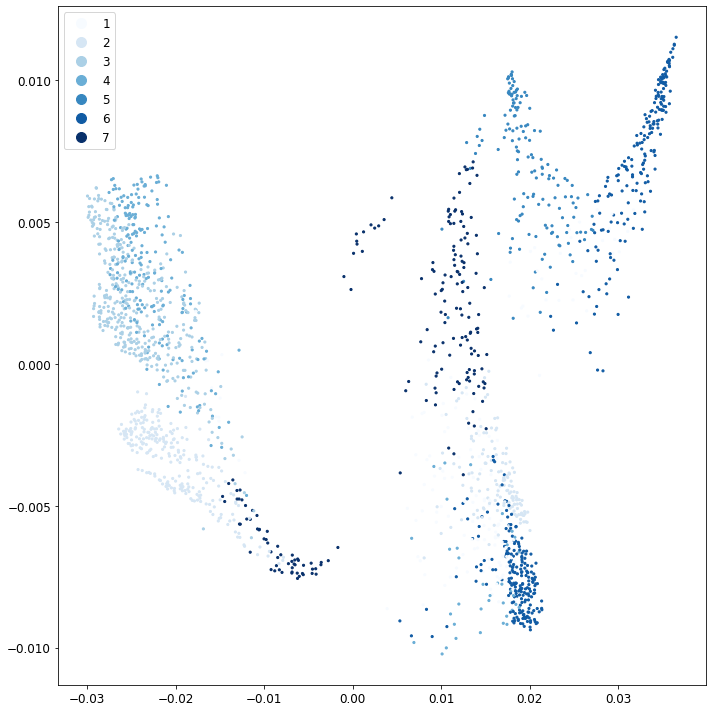

In [ ]:
phate.plot.scatter2d(PhateData,c=cluster,cmap='Blues',figsize=(10,10))

In [ ]:
KMeans_clustered.data

,0,1,2,3,4,5,6,sum_score,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,cluster
0,0.8,1.00000,1.00000,0.00000,1.0,0.0,0.50000,18.00000,0.974567,0.399351,0.892293,1.351877,1.785951,1.462091,0.938182,2
1,0.2,1.00000,0.66667,0.66667,0.5,0.0,0.33333,13.00001,0.395506,1.001488,0.841083,1.300890,0.769545,0.844176,0.336375,7
2,1.0,0.66667,1.00000,0.66667,0.0,0.4,1.00000,23.00002,0.702723,1.033183,1.258399,1.166372,1.388142,0.232473,1.755102,6
3,0.2,1.00000,0.33333,0.66667,0.5,0.8,0.50000,15.99999,0.817697,1.133261,1.240607,0.875993,0.883755,1.026933,0.466578,7
4,0.8,1.00000,1.00000,1.00000,1.0,0.2,1.00000,25.00000,0.792294,0.719243,0.121296,0.400363,2.663142,0.663036,1.498918,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,0.6,0.66667,0.16667,0.00000,0.0,0.6,0.50000,12.00003,1.338154,1.409760,2.440316,2.177228,0.290881,1.431618,0.878072,5
1933,0.2,0.33333,1.00000,1.00000,1.0,0.4,0.16667,16.00001,1.001563,1.697306,1.024481,1.150830,2.082860,1.763377,1.112773,1
1934,0.8,0.33333,0.66667,0.66667,0.5,0.0,1.00000,18.00002,0.744166,0.780457,0.676641,1.109637,1.240571,0.501187,1.076367,6
1935,0.8,0.66667,0.66667,0.66667,0.5,0.2,0.33333,16.00002,0.100236,0.676604,0.581236,0.793413,0.768994,0.508098,0.480261,1


In [ ]:
KMeans_clustered.data.groupby('cluster').agg(np.mean)

,0,1,2,3,4,5,6,sum_score,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7
cluster,,,,,,,,,,,,,,,
1,0.695706,0.852762,0.852760,0.721882,0.441718,0.283436,0.415134,18.110438,0.335284,0.921200,0.819862,0.935886,1.182571,0.630612,0.876722
2,0.710649,0.883984,0.834632,0.232032,0.815584,0.364675,0.860173,20.524664,0.881518,0.295602,0.720403,0.794940,1.508323,0.893061,0.872562
3,0.695116,0.860327,0.837189,0.834620,1.000000,0.209254,0.808054,21.478151,0.708776,0.648999,0.224198,0.504808,2.115402,0.797598,1.051694
4,0.733603,0.871796,0.853576,0.821864,0.927126,0.731984,0.804993,24.214577,0.848146,0.746881,0.528154,0.247544,2.217667,0.871108,1.251206
5,0.307190,0.603487,0.427015,0.185185,0.035948,0.296732,0.423747,10.562092,1.299076,1.664510,2.342993,2.421913,0.451789,1.514533,0.930007
6,0.725926,0.869960,0.844032,0.767903,0.264198,0.323457,0.923868,21.296294,0.593526,0.895657,0.871598,0.921762,1.360942,0.298198,1.273084
7,0.284103,0.777779,0.444444,0.347008,0.684615,0.295385,0.417094,12.810259,0.947187,0.982709,1.233245,1.409411,0.883966,1.380636,0.405749


In [ ]:
KMeans_clustered.data.pivot_table(values='sum_score', index='cluster',aggfunc=np.mean).sort_values('sum_score')

,sum_score
cluster,
5,10.562092
7,12.810259
1,18.110438
2,20.524664
6,21.296294
3,21.478151
4,24.214577


## Sampling and Convergence Proof

In [ ]:
sample_unique=raw_data_unique.sample(frac=0.5, replace=False)

In [ ]:
sample_unique.reset_index()

,index,0,1,2,3,4,5,6
0,1753,0.4,1.00000,0.16667,0.00000,0.5,0.0,0.50000
1,1018,0.8,1.00000,0.50000,1.00000,1.0,0.4,1.00000
2,894,0.8,1.00000,0.50000,0.33333,1.0,0.2,1.00000
3,964,0.4,1.00000,0.66667,0.66667,1.0,0.4,0.83333
4,641,0.8,1.00000,0.66667,1.00000,1.0,0.8,1.00000
...,...,...,...,...,...,...,...,...
963,1641,0.6,0.33333,0.83333,0.66667,0.5,0.6,1.00000
964,182,1.0,0.00000,1.00000,0.66667,0.5,0.2,1.00000
965,1187,0.6,0.66667,1.00000,0.66667,0.5,0.4,0.16667
966,1467,0.6,1.00000,0.33333,1.00000,1.0,0.0,1.00000


In [ ]:
PhateOp=phate.PHATE(knn=50, decay=None, t='auto', mds_solver='smacof')
PhateData = PhateOp.fit_transform(sample_unique)

Calculating PHATE...
  Running PHATE on 968 observations and 7 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
  Calculated graph and diffusion operator in 0.05 seconds.
  Calculating optimal t...
    Automatically selected t = 16
  Calculated optimal t in 0.70 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.25 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 12.27 seconds.
Calculated PHATE in 13.30 seconds.


In [ ]:
KMeans_clustered.data=sample_unique.copy()
cluster=KMeans_clustered.cluster_return()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  """Entry point for launching an IPython kernel.


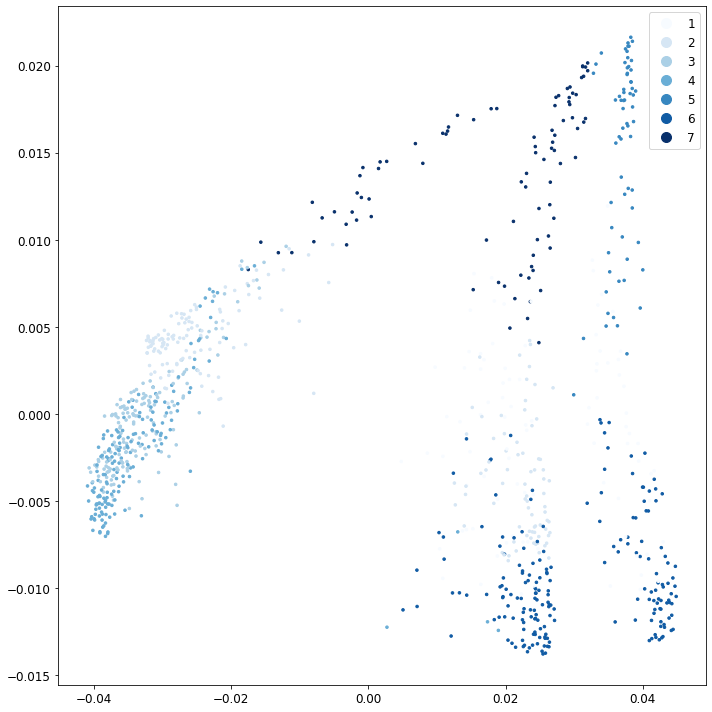

In [ ]:
phate.plot.scatter2d(PhateData,c=cluster,cmap='Blues',figsize=(10,10))

# Phate on Uniform MoCA

## Generation of uniform MoCA score using list comprehension

In [ ]:
possible_score=[[x0/5,x1/3,x2/6,x3/3,x4/2,x5/5,x6/6] for x0 in range(6) for x1 in range(4) for x2 in range(7) for x3 in range(4) for x4 in range(3) for x5 in range(6) for x6 in range(7)]
np_possible_score=np.array(possible_score)
np_possible_score.reshape(84672,7)
cluster=np_possible_score.sum(axis=1)

## Example of Phate on Uniform Data

Calculating PHATE...
  Running PHATE on 84672 observations and 7 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 10.42 seconds.
  Calculated graph and diffusion operator in 10.51 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 11.47 seconds.
    Calculating KMeans...
    Calculated KMeans in 47.16 seconds.
  Calculated landmark operator in 62.28 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 4.73 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.90 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 24.53 seconds.
Calculated PHATE in 104.99 seconds.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  This is separate from the ipykernel package so we can avoid doing imports until


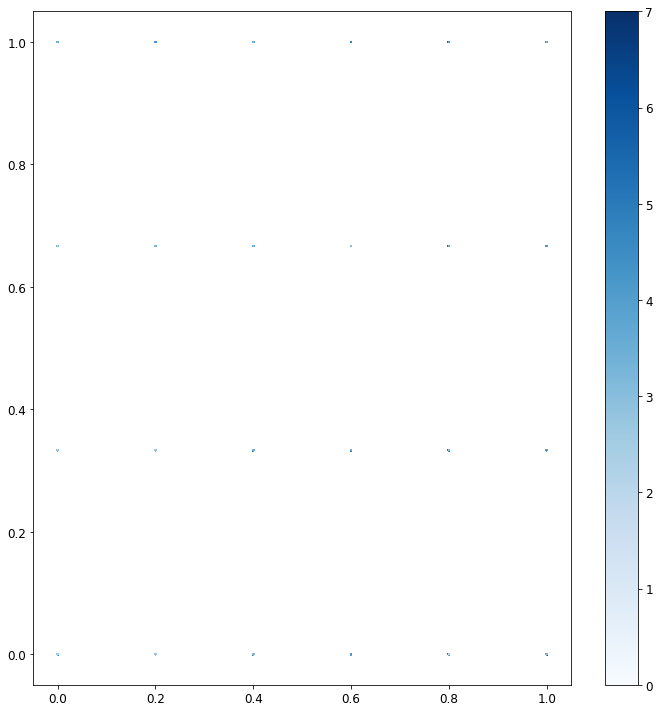

In [ ]:
PhateOp=phate.PHATE(knn=20, decay=None, t='auto', mds_solver='smacof')
PhateData = PhateOp.fit_transform(np_possible_score.copy())
phate.plot.scatter2d(PhateData,c=cluster,cmap='Blues',figsize=(10,10))

## Change in PHATE by decaying kernel

In [ ]:
for alpha in [None,2,4,8,16]:
    PhateOp=phate.PHATE(knn=20, decay=alpha, t='auto', mds_solver='smacof')
    PhateData = PhateOp.fit_transform(np_possible_score.copy())
    phate.plot.scatter2d(PhateData,c=cluster,cmap='Blues',figsize=(10,10), title='alpha = {}'.format(alpha))

Calculating PHATE...
  Running PHATE on 84672 observations and 7 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 10.25 seconds.
  Calculated graph and diffusion operator in 10.34 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 11.38 seconds.
    Calculating KMeans...
    Calculated KMeans in 57.56 seconds.
  Calculated landmark operator in 72.40 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 4.74 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.77 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 26.81 seconds.
Calculated PHATE in 117.09 seconds.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  after removing the cwd from sys.path.


Calculating PHATE...
  Running PHATE on 84672 observations and 7 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 23.01 seconds.
    Calculating affinities...


## Colored by Domain's score

In [ ]:
for i in range(7):
    cluster_i=np_possible_score[:,i]
    phate.plot.scatter2d(data_phate,c=cluster_i,cmap='Blues',figsize=(10,10), title='cluster by domain {}'.format(i+1))